In [284]:
# import and config
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from zipfile import ZipFile
from pathlib import Path
from os import getcwd, listdir, path
import os 
import scipy.io
import warnings
from typing import Dict
warnings.filterwarnings('ignore')

%cd "/home/matej/2-fer/uuzop/projekt"
UNZIP_DATA = False

PATH_CWD = Path(getcwd()) 

PATH_DATA = Path(PATH_CWD, "data")
PATH_DATA_MAT = Path(PATH_DATA, "mat")
PATH_DATA_CNT = Path(PATH_DATA, "cnt")

PATH_ZIP_CNT = Path(PATH_DATA, "5202739.zip")
PATH_ZIP_MAT = Path(PATH_DATA, "5202751.zip")



/home/matej/2-fer/uuzop/projekt


In [5]:
# CNT - unzip and restructure data
if  UNZIP_DATA:
    with ZipFile(PATH_ZIP_CNT, 'r') as zip_ref:
        zip_ref.extractall(PATH_DATA_CNT)
    
    zips = [file for file in PATH_DATA_CNT.iterdir() if str(file).endswith(".zip")]
    
    for zip_item in zips:
        
        if not str(zip_item).endswith(".zip"):
            continue
        
        zip_ref = ZipFile(zip_item) # create zipfile object
        
        for cnt_file in zip_ref.namelist()[1:]: # ignore "9/" directory
        
            prefix_number = zip_item.stem # 9
            state_name = Path(cnt_file).stem.lower().split(' ')[0] # "Normal State" -> "normal"
            filename = Path(prefix_number + '_' + state_name + ".cnt")
            
            with open(Path(PATH_DATA_CNT, filename), "wb") as new_file:
                new_file.write(zip_ref.read(cnt_file))
                
    # Delete zips as they were temporary
    for zip_item in zips:
    	os.remove(zip_item)

In [6]:
# MAT - unzip data
if  UNZIP_DATA:
    with ZipFile(PATH_ZIP_MAT, 'r') as zip_ref:
        zip_ref.extractall(PATH_DATA_MAT)

In [288]:
mat = scipy.io.loadmat(Path(PATH_DATA_MAT, '1.mat'))
keys = [key for key in mat.keys() if not key.startswith('__')]

[print(key, "with shape",mat[key].shape) for key in keys]

is_fatigue_mask = pd.Series(mat["Class_label"].squeeze() == 1)
keys_entropy = ["FE", "SE", "AE", "PE"]


entropies: Dict[str,pd.DataFrame]={}
for key in keys_entropy:
    entropies[key] = pd.DataFrame(mat[key])
    print(key, "\n",entropies[key].describe())   

fe_df = entropies["FE"]

FE with shape (300, 30)
SE with shape (300, 30)
AE with shape (300, 30)
PE with shape (300, 30)
Class_label with shape (300, 1)
FE 
                0           1           2           3           4           5   \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     0.431359    0.563979    0.417747    0.493588    0.414482    0.694414   
std      0.248203    0.305999    0.245915    0.097227    0.107826    0.060513   
min      0.121665    0.145772    0.124204    0.342008    0.224410    0.609064   
25%      0.180654    0.257208    0.184079    0.416103    0.304050    0.655356   
50%      0.482518    0.610600    0.396680    0.464015    0.426226    0.671115   
75%      0.662479    0.866264    0.616511    0.562170    0.508063    0.705368   
max      0.883251    1.052312    0.945170    0.753312    0.610341    0.885359   

               6           7           8           9   ...          20  \
count  300.000000  300.000000  300.000000  300.000000  ...  300

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       300 non-null    float64
 1   1       300 non-null    float64
 2   2       300 non-null    float64
 3   3       300 non-null    float64
 4   4       300 non-null    float64
 5   5       300 non-null    float64
 6   6       300 non-null    float64
 7   7       300 non-null    float64
 8   8       300 non-null    float64
 9   9       300 non-null    float64
 10  10      300 non-null    float64
 11  11      300 non-null    float64
 12  12      300 non-null    float64
 13  13      300 non-null    float64
 14  14      300 non-null    float64
 15  15      300 non-null    float64
 16  16      300 non-null    float64
 17  17      300 non-null    float64
 18  18      300 non-null    float64
 19  19      300 non-null    float64
 20  20      300 non-null    float64
 21  21      300 non-null    float64
 22  22

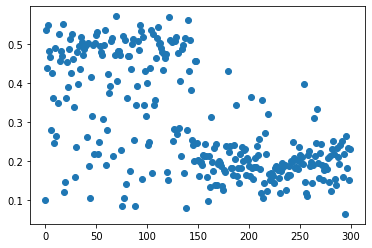

In [308]:
entropies["FE"].info()
print()
# print(fe_df.iloc[:,])
plt.scatter(fe_df.index.tolist(), entropies["SE"].loc[:,0])